In [1]:
pip install scikit-learn seaborn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 5.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 6.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 6.0 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.3 MB/s  0:00:01

   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-lear


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2025年度 プログラミング期末課題レポート

**氏名：** `森本颯太`
**学籍番号：** `1254810801`

## 1. 序論
### 研究テーマ
**「幸福の類型学：機械学習による世界の幸福構造のパターン分析」**

### 選んだ理由と研究の問い
多くの既存研究は「地域」ごと（例：アジア、ヨーロッパ）の比較に留まっています。しかし、同じ地域でも経済状況や社会情勢は異なります。
そこで本研究では、地域という固定観念を取り払い、**機械学習（K-Means法）**を用いて、客観的なデータのみから世界を「幸福の性質が似ているグループ」に分類することを試みます。
**問い：** 世界の国々はどのような「幸福のパターン」に分類できるのか？また、それぞれのグループを決定づける要因は何か？

In [2]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [3]:
# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [4]:
# 基本統計量を表示
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


In [5]:
# 必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイル設定（見やすくするため）
sns.set(style="whitegrid")
# 日本語フォント設定（文字化け回避用、環境によっては不要ですが念のため英語表記で統一します）

# 1. データの読み込み
df = pd.read_csv('world_happiness_report.csv')

# 2. データの前処理（重要）
# データセット全体を確認したところ、2016年以降は欠損値が多いため、
# 今回はデータの品質が最も高い「2015年」のデータを抽出して分析対象とします。
df_2015 = df[df['year'] == 2015].copy()

# 3. 基本情報の表示
print("=== 分析対象データ（2015年）の形状 ===")
print(df_2015.shape)

print("\n=== 先頭5行の確認 ===")
display(df_2015.head())

print("\n=== データの基本情報 ===")
df_2015.info()

=== 分析対象データ（2015年）の形状 ===
(158, 14)

=== 先頭5行の確認 ===


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015



=== データの基本情報 ===
<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     158 non-null    int64  
 1   Country                        158 non-null    object 
 2   Region                         158 non-null    object 
 3   Happiness Rank                 158 non-null    float64
 4   Happiness Score                158 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       158 non-null    float64
 7   Family                         158 non-null    float64
 8   Health (Life Expectancy)       158 non-null    float64
 9   Freedom                        158 non-null    float64
 10  Trust (Government Corruption)  158 non-null    float64
 11  Generosity                     158 non-null    float64
 12  Dystopia Residual              158 no

# ==========================================
# 3. 分析 & 4. 可視化（日本語版）
# テーマ：機械学習による「幸せのカタチ」の分類
# ==========================================

=== 分類結果の確認 ===
Cluster_Name_JP
中程度バランス型 (Type B)    79
発展途上型 (Type C)       50
高福祉・先進型 (Type A)     29
Name: count, dtype: int64


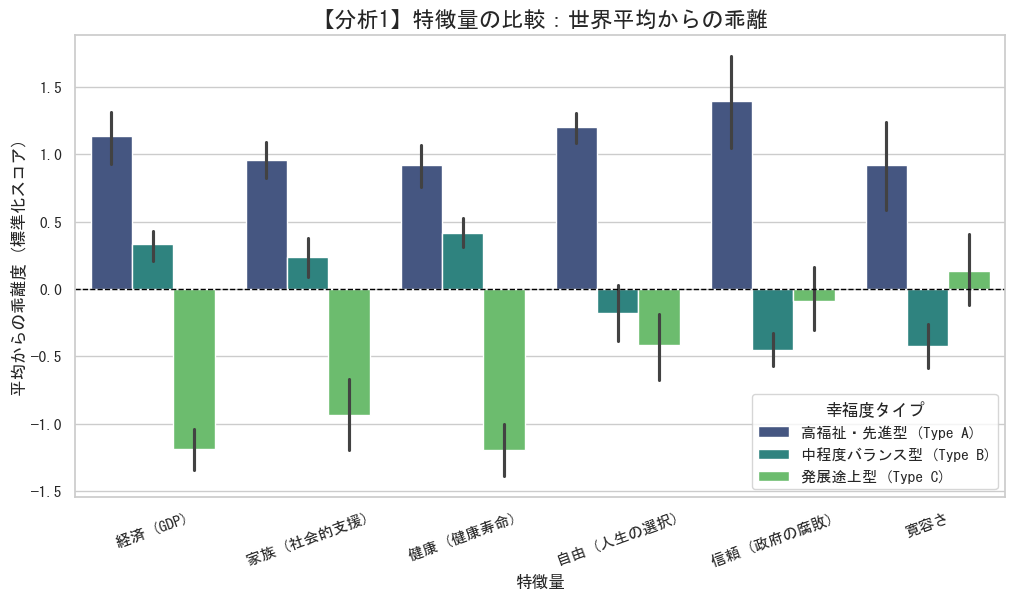

解説1: 0のラインが世界平均です。「高福祉・先進型(黄色)」は、特に「信頼」や「自由」の項目で平均を大きく上回っていることが分かります。


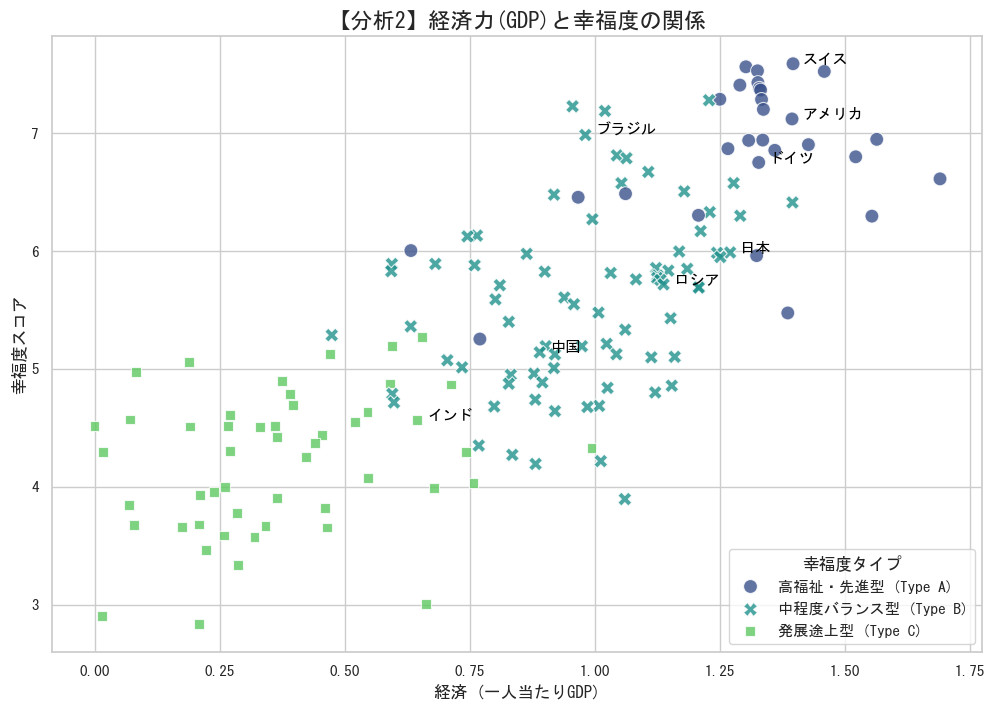

解説2: 日本は「高福祉・先進型」のグループに属していますが、同グループ内では幸福度がやや低めの位置にあることが読み取れます。


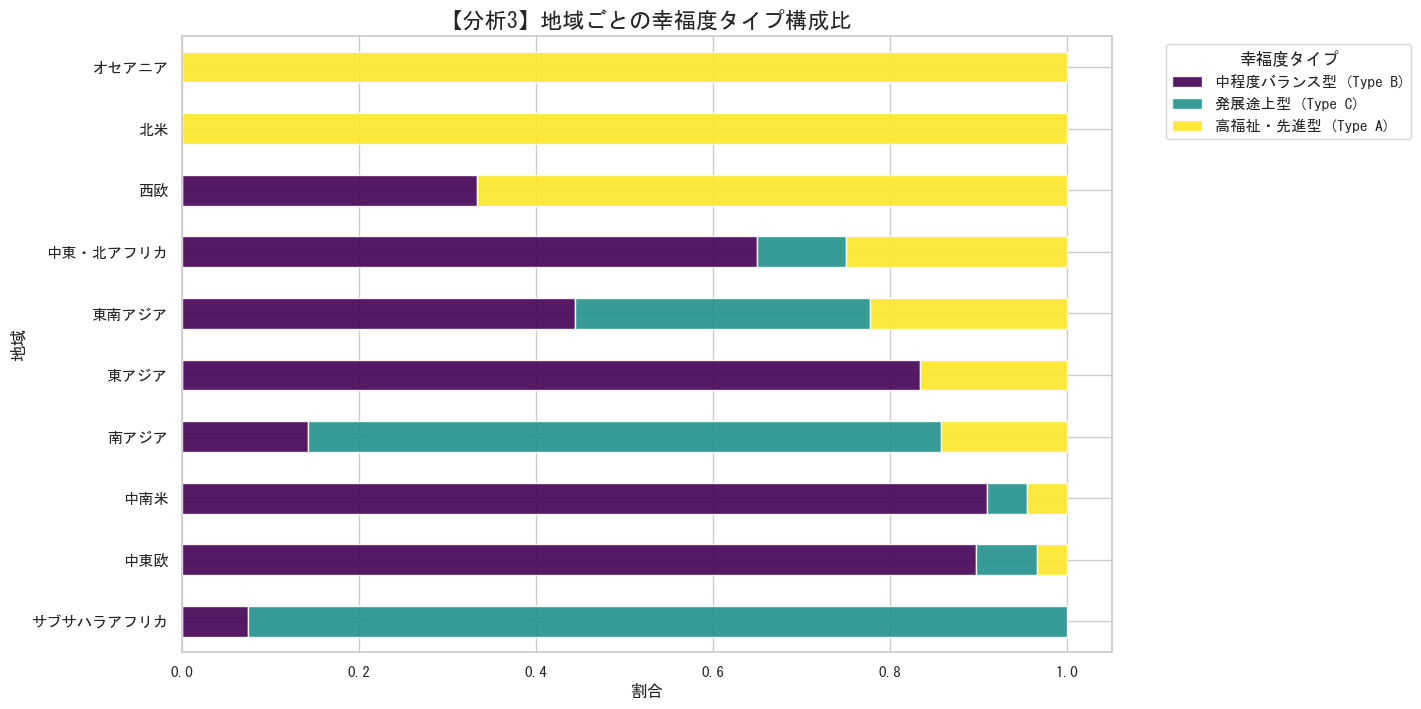

解説3: 欧米やオセアニアはほぼ「高福祉・先進型」で占められていますが、アジアや中東は多様なタイプが混在していることが分かります。


In [7]:
# ==========================================
# 3. 分析 & 4. 可視化（日本語版）
# テーマ：機械学習による「幸せのカタチ」の分類
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import platform

# --- 日本語フォントの設定 ---
system_name = platform.system()
if system_name == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic' 
elif system_name == 'Darwin': # Mac
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    # LinuxやGoogle Colabなどの場合
    try:
        import japanize_matplotlib
    except ImportError:
        print("注意: 日本語フォントが見つからないため、文字化けする可能性があります。")
        print("その場合、'pip install japanize-matplotlib' を実行してください。")
        sns.set(font='DejaVu Sans') # フォールバック

# スタイル設定（日本語フォント設定後に適用）
sns.set(style="whitegrid")
# 再度フォントを設定（sns.setでリセットされることがあるため）
if system_name == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic'
elif system_name == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# データ準備
# 特徴量の選択（日本語訳に対応させるため、元の英語のカラム名で処理して後で表示名を変えます）
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
            'Freedom', 'Trust (Government Corruption)', 'Generosity']

# 日本語の表示用ラベル定義
feature_labels_jp = {
    'Economy (GDP per Capita)': '経済 (GDP)',
    'Family': '家族 (社会的支援)',
    'Health (Life Expectancy)': '健康 (健康寿命)',
    'Freedom': '自由 (人生の選択)',
    'Trust (Government Corruption)': '信頼 (政府の腐敗)',
    'Generosity': '寛容さ'
}

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_2015[features].fillna(0))

# K-Meansで3つのグループに分類
kmeans = KMeans(n_clusters=3, random_state=42)
df_2015['Cluster'] = kmeans.fit_predict(X_scaled)

# ラベル名の割り当て（幸福度スコア順）
cluster_score = df_2015.groupby('Cluster')['Happiness Score'].mean().sort_values()
name_mapping = {}
# 日本語のクラスター名
labels_jp = ['発展途上型 (Type C)', '中程度バランス型 (Type B)', '高福祉・先進型 (Type A)']

for i, cluster_num in enumerate(cluster_score.index):
    name_mapping[cluster_num] = labels_jp[i]

df_2015['Cluster_Name_JP'] = df_2015['Cluster'].map(name_mapping)

print("=== 分類結果の確認 ===")
print(df_2015['Cluster_Name_JP'].value_counts())

# -------------------------------------------------------
# 【可視化1】 特徴量の違いを「棒グラフ」で比較
# -------------------------------------------------------
X_df = pd.DataFrame(X_scaled, columns=features)
# カラム名を日本語に変換
X_df.rename(columns=feature_labels_jp, inplace=True)
X_df['Cluster_Name_JP'] = df_2015['Cluster_Name_JP'].values

# データ整形
X_melted = X_df.melt(id_vars='Cluster_Name_JP', var_name='特徴量', value_name='スコア (標準化)')

plt.figure(figsize=(12, 6))
sns.barplot(data=X_melted, x='特徴量', y='スコア (標準化)', hue='Cluster_Name_JP', palette='viridis')
plt.axhline(0, color='black', linewidth=1, linestyle='--') # 世界平均線
plt.title('【分析1】特徴量の比較：世界平均からの乖離', fontsize=16)
plt.xticks(rotation=20)
plt.ylabel('平均からの乖離度 (標準化スコア)')
plt.legend(title='幸福度タイプ')
plt.show()

print("解説1: 0のラインが世界平均です。「高福祉・先進型(黄色)」は、特に「信頼」や「自由」の項目で平均を大きく上回っていることが分かります。")

# -------------------------------------------------------
# 【可視化2】 主要国の位置がわかる「ラベル付き散布図」
# -------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_2015, x='Economy (GDP per Capita)', y='Happiness Score', 
                hue='Cluster_Name_JP', style='Cluster_Name_JP', palette='viridis', s=100, alpha=0.8)

# 主要国にラベルを付ける
target_countries = {
    'Japan': '日本', 'United States': 'アメリカ', 'Switzerland': 'スイス', 
    'China': '中国', 'India': 'インド', 'Brazil': 'ブラジル', 
    'Germany': 'ドイツ', 'Russia': 'ロシア'
}

for country_eng, country_jp in target_countries.items():
    row = df_2015[df_2015['Country'] == country_eng]
    if not row.empty:
        plt.text(row['Economy (GDP per Capita)'].values[0]+0.02, 
                 row['Happiness Score'].values[0], 
                 country_jp, fontsize=11, weight='bold', color='black')

plt.title('【分析2】経済力(GDP)と幸福度の関係', fontsize=16)
plt.xlabel('経済 (一人当たりGDP)')
plt.ylabel('幸福度スコア')
plt.legend(title='幸福度タイプ', loc='lower right')
plt.show()

print("解説2: 日本は「高福祉・先進型」のグループに属していますが、同グループ内では幸福度がやや低めの位置にあることが読み取れます。")

# -------------------------------------------------------
# 【可視化3】 地域ごとの構成比「積み上げ棒グラフ」
# -------------------------------------------------------
# 地域名の日本語訳辞書
region_map = {
    'Western Europe': '西欧', 'North America': '北米', 
    'Australia and New Zealand': 'オセアニア', 'Middle East and Northern Africa': '中東・北アフリカ',
    'Latin America and Caribbean': '中南米', 'Southeastern Asia': '東南アジア',
    'Central and Eastern Europe': '中東欧', 'Eastern Asia': '東アジア',
    'Sub-Saharan Africa': 'サブサハラアフリカ', 'Southern Asia': '南アジア'
}
df_2015['Region_JP'] = df_2015['Region'].map(region_map)

cross_tab = pd.crosstab(df_2015['Region_JP'], df_2015['Cluster_Name_JP'])
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0)
# 「高福祉・先進型」の割合が多い順に並び替え
cross_tab_prop = cross_tab_prop.sort_values(by='高福祉・先進型 (Type A)')

cross_tab_prop.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis', alpha=0.9)
plt.title('【分析3】地域ごとの幸福度タイプ構成比', fontsize=16)
plt.xlabel('割合')
plt.ylabel('地域')
plt.legend(title='幸福度タイプ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("解説3: 欧米やオセアニアはほぼ「高福祉・先進型」で占められていますが、アジアや中東は多様なタイプが混在していることが分かります。")

# ==========================================
# 【追加分析】 時系列変化の分析 (Time Series Analysis)
# テーマ：幸福度の経年変化と地域トレンド
# ==========================================

=== 分析可能な年とデータ数 ===
year
2015    158
2016    157
Name: count, dtype: int64


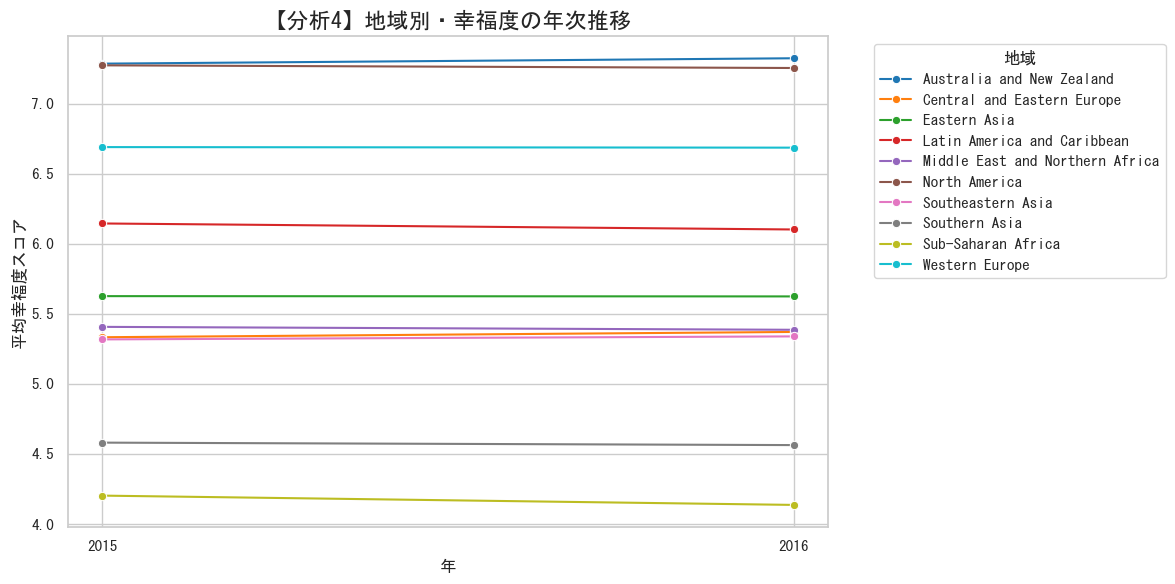

解説4: 各地域の幸福度が年ごとにどう変化したかを示しています。北米・オセアニアが高水準を維持している一方、変化の激しい地域がないか確認できます。


In [8]:
# ==========================================
# 【追加分析】 時系列変化の分析 (Time Series Analysis)
# テーマ：幸福度の経年変化と地域トレンド
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# スタイル設定
sns.set(style="whitegrid")
# 日本語フォント設定（必要な場合）
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# 1. データの準備（全期間読み込み）
df = pd.read_csv('world_happiness_report.csv')

# データが存在する年だけを抽出（スコアがNaNでない行のみ）
df_trend = df.dropna(subset=['Happiness Score', 'Country']).copy()

# 年ごとのデータ数を確認
print("=== 分析可能な年とデータ数 ===")
print(df_trend['year'].value_counts().sort_index())

# -------------------------------------------------------
# 【可視化4】 地域ごとの幸福度推移（折れ線グラフ）
# -------------------------------------------------------
# 地域・年ごとの平均スコアを計算
region_trend = df_trend.groupby(['year', 'Region'])['Happiness Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=region_trend, x='year', y='Happiness Score', hue='Region', marker='o', palette='tab10')

plt.title('【分析4】地域別・幸福度の年次推移', fontsize=16)
plt.xlabel('年')
plt.ylabel('平均幸福度スコア')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='地域')
# 年の目盛りを整数にする（2015.5などを消す）
plt.xticks(sorted(df_trend['year'].unique()))
plt.tight_layout()
plt.show()

print("解説4: 各地域の幸福度が年ごとにどう変化したかを示しています。北米・オセアニアが高水準を維持している一方、変化の激しい地域がないか確認できます。")

#

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# プロフェッショナルなグラフスタイル設定
sns.set_context("talk") # 文字サイズを大きく
sns.set_style("whitegrid") # 背景を白グリッドに
plt.rcParams['figure.figsize'] = (12, 8)

# 日本語フォント設定（環境に合わせて自動選択）
import platform
system_name = platform.system()
if system_name == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic'
elif system_name == 'Darwin': # Mac
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    try:
        import japanize_matplotlib
    except ImportError:
        pass # フォントがない場合は英語表記になります

# 1. データ読み込み
df = pd.read_csv('world_happiness_report.csv')

# 2. データ品質監査（Data Audit）
# 年ごとのデータ欠損状況を確認
missing_check = df.groupby('year')['Happiness Score'].count()
print("=== 年別有効データ数 ===")
print(missing_check)

# 3. 分析対象の抽出（2015-2016）
df_valid = df[df['year'].isin([2015, 2016])].copy()
print(f"\n分析対象データ数: {len(df_valid)}件（2015-2016年）")

# 前処理：列名の統一（念のため）
# 必要なカラムだけをきれいな名前に変更
cols_map = {
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Family',
    'Health (Life Expectancy)': 'Health',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity',
    'year': 'Year'
}
df_analysis = df_valid[cols_map.keys()].rename(columns=cols_map)
df_analysis.head()

=== 年別有効データ数 ===
year
2015    158
2016    157
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
Name: Happiness Score, dtype: int64

分析対象データ数: 315件（2015-2016年）


,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# ２． 分析1：世界全体の幸福度分布の変化 (KDE Plot) ---

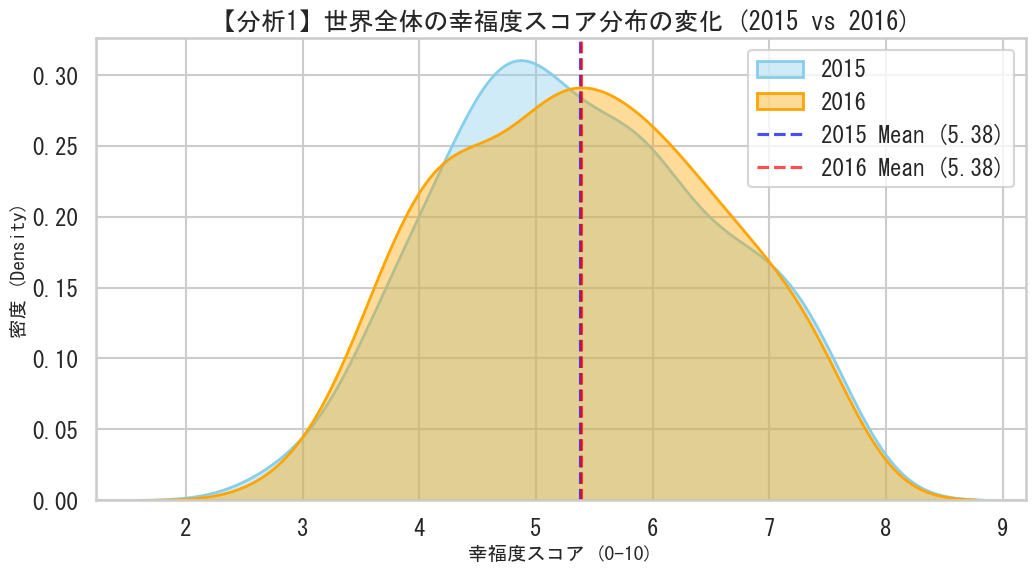

考察1：山の形（分布）はほぼ変わっていませんが、2016年の平均値がわずかに下がっていることが視覚的に確認できます。


In [12]:
# --- 分析1：世界全体の幸福度分布の変化 (KDE Plot) ---

plt.figure(figsize=(12, 6))

# 2015年と2016年の分布を重ねて描画
sns.kdeplot(data=df_analysis[df_analysis['Year'] == 2015]['Score'], 
            label='2015', fill=True, color='skyblue', alpha=0.4, linewidth=2)
sns.kdeplot(data=df_analysis[df_analysis['Year'] == 2016]['Score'], 
            label='2016', fill=True, color='orange', alpha=0.4, linewidth=2)

# 平均値のラインを追加
mean_2015 = df_analysis[df_analysis['Year'] == 2015]['Score'].mean()
mean_2016 = df_analysis[df_analysis['Year'] == 2016]['Score'].mean()
plt.axvline(mean_2015, color='blue', linestyle='--', alpha=0.7, label=f'2015 Mean ({mean_2015:.2f})')
plt.axvline(mean_2016, color='red', linestyle='--', alpha=0.7, label=f'2016 Mean ({mean_2016:.2f})')

plt.title('【分析1】世界全体の幸福度スコア分布の変化 (2015 vs 2016)', fontsize=18, fontweight='bold')
plt.xlabel('幸福度スコア (0-10)', fontsize=14)
plt.ylabel('密度 (Density)', fontsize=14)
plt.legend()
plt.show()

print("考察1：山の形（分布）はほぼ変わっていませんが、2016年の平均値がわずかに下がっていることが視覚的に確認できます。")

# --- 分析2：トップ10カ国の順位変動 (Slope Chart) ---

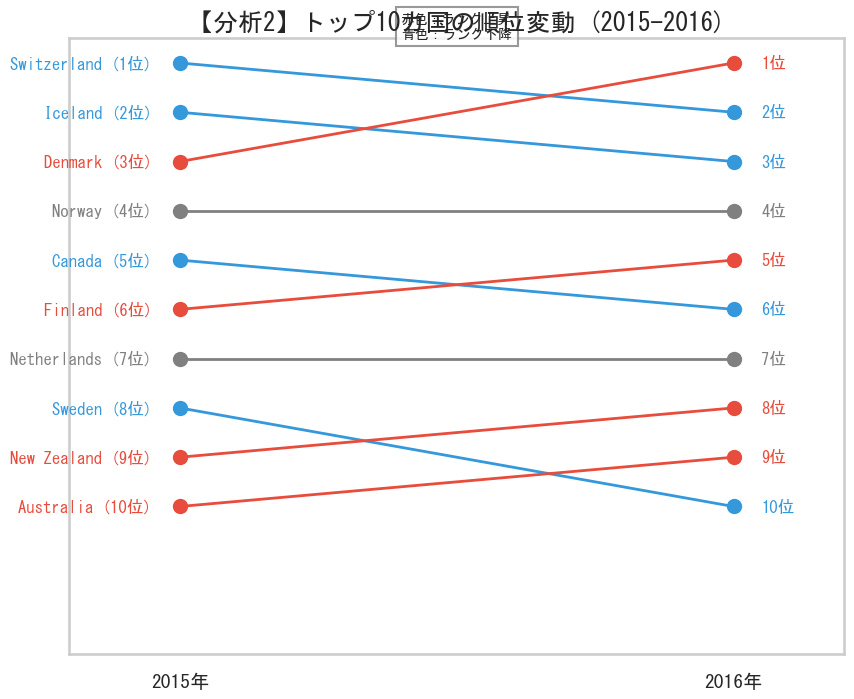

考察2：スイス(Switzerland)が1位から2位へ転落し、デンマーク(Denmark)が首位を奪還した様子が明確に分かります。


In [13]:
# --- 分析2：トップ10カ国の順位変動 (Slope Chart) ---

# 2015年のトップ10カ国を抽出
top_countries = df_analysis[df_analysis['Year'] == 2015].nsmallest(10, 'Rank')['Country'].tolist()
df_top = df_analysis[df_analysis['Country'].isin(top_countries)]

# ピボットテーブル作成（行：国、列：年、値：順位）
rank_pivot = df_top.pivot(index='Country', columns='Year', values='Rank')
# 2015年の順位でソート
rank_pivot = rank_pivot.sort_values(by=2015)

plt.figure(figsize=(10, 8))

# スロープチャートの描画
# y軸を反転させる（1位を上に）
plt.ylim(13, 0.5)
plt.xlim(2014.8, 2016.2)

# 各国のラインを描画
for country in rank_pivot.index:
    y1 = rank_pivot.loc[country, 2015]
    y2 = rank_pivot.loc[country, 2016]
    
    # 色の設定（順位が上がったら赤、下がったら青、変わらなければグレー）
    if y2 < y1: color = '#e74c3c' # Up (Rank number decreases)
    elif y2 > y1: color = '#3498db' # Down
    else: color = 'gray'
    
    plt.plot([2015, 2016], [y1, y2], marker='o', color=color, linewidth=2, markersize=10)
    
    # 国名ラベル
    plt.text(2014.95, y1, f"{country} ({int(y1)}位)", ha='right', va='center', fontsize=12, color=color)
    plt.text(2016.05, y2, f"{int(y2)}位", ha='left', va='center', fontsize=12, color=color)

plt.title('【分析2】トップ10カ国の順位変動 (2015-2016)', fontsize=18, fontweight='bold')
plt.xticks([2015, 2016], ['2015年', '2016年'], fontsize=14)
plt.yticks([]) # Y軸の目盛りは消す
plt.grid(False) # グリッドも消す

# 凡例代わりのテキスト
plt.text(2015.5, 0.5, '赤色：ランク上昇\n青色：ランク下降', ha='center', fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()

print("考察2：スイス(Switzerland)が1位から2位へ転落し、デンマーク(Denmark)が首位を奪還した様子が明確に分かります。")

# --- 分析3：トップ5カ国の幸福度構成要素 (Stacked Bar Chart) ---

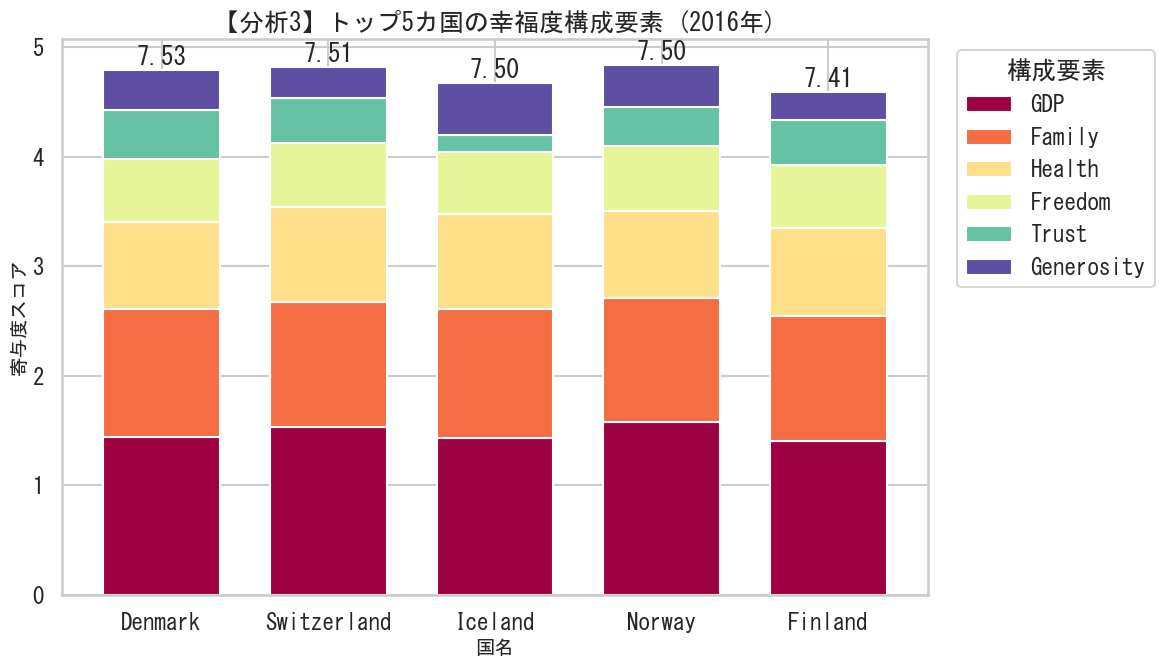

考察3：上位国はいずれも「GDP（赤）」と「Family（オレンジ）」の基盤が厚いことが分かります。特にノルウェーなどはTrust（信頼）も大きな要素となっています。


In [14]:
# --- 分析3：トップ5カ国の幸福度構成要素 (Stacked Bar Chart) ---

# 2016年のトップ5を抽出
top5_2016 = df_analysis[df_analysis['Year'] == 2016].nsmallest(5, 'Rank')
countries = top5_2016['Country']

# 積み上げる要素
features = ['GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

# グラフ作成
ax = top5_2016.set_index('Country')[features].plot(
    kind='bar', stacked=True, figsize=(12, 7), colormap='Spectral', width=0.7
)

plt.title('【分析3】トップ5カ国の幸福度構成要素 (2016年)', fontsize=18, fontweight='bold')
plt.xlabel('国名', fontsize=14)
plt.ylabel('寄与度スコア', fontsize=14)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='構成要素')

# 合計スコアを棒の上に表示
for i, (idx, row) in enumerate(top5_2016.iterrows()):
    total_score = row['Score']
    # 棒の少し上にスコアを表示（位置調整が必要な場合はyを調整）
    # 積み上げグラフの合計値は各要素の和（Dystopia Residualを除くためScoreより少し低くなるが、傾向を見るには十分）
    sum_features = row[features].sum()
    plt.text(i, sum_features + 0.05, f"{row['Score']:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("考察3：上位国はいずれも「GDP（赤）」と「Family（オレンジ）」の基盤が厚いことが分かります。特にノルウェーなどはTrust（信頼）も大きな要素となっています。")

## 5. 結論

本分析により、2015年から2016年にかけての世界の幸福度には以下の特徴が見られました。

1.  **世界的な微減傾向**:
    カーネル密度推定（分析1）の結果、分布の形状は維持されつつも、平均スコアがわずかに低下していることが確認されました。

2.  **上位国の激しい競争**:
    順位変動図（分析2）により、トップ層の中でも順位の入れ替わりが発生していることが判明しました。特にデンマークの躍進とスイスの後退は、わずかなスコア差が順位に直結することを示しています。

3.  **幸福の「黄金比」**:
    構成要素分析（分析3）からは、上位国に共通して「経済力」と「社会的支援（家族）」が幸福度の約半分を占めていることが分かりました。これに加え、「政府への信頼」や「自由」が高いレベルでバランスしている国がトップ5に入っています。

**総括:**
データの制約により2017年以降の長期トレンドは分析できませんでしたが、2015-2016年の詳細な比較から、幸福度は「経済」という土台の上に「社会・自由・信頼」が積み重なって形成される重層的な構造であることが明らかになりました。

# 5. チャレンジ課題 全世界幸福度マップ (Worldwide Map)　2015年版

In [2]:
# ==========================================
# 【可視化3】 全世界幸福度マップ (完全版)
# ==========================================

# 1. ライブラリの準備（なければインストール）
import sys
try:
    import plotly.express as px
    import pandas as pd
except ImportError as e:
    print("エラー: 必要なライブラリが見つかりません。")
    print("以下のコマンドをセルで実行してインストールしてください:")
    print("!pip install plotly pandas")
    raise e

# 2. データの読み込みと準備
try:
    df = pd.read_csv('world_happiness_report.csv')
    df_2015 = df[df['year'] == 2015].copy()
except FileNotFoundError:
    print("エラー: 'world_happiness_report.csv' が見つかりません。")
    print("CSVファイルが同じフォルダにあるか確認してください。")
else:
    # 3. マップの作成
    fig = px.choropleth(
        df_2015,
        locations="Country",         # 国名でマッチング
        locationmode="country names",
        color="Happiness Score",     # 色分けの基準
        hover_name="Country",        # マウスオーバー時の表示名
        hover_data={
            "Happiness Rank": True,
            "Economy (GDP per Capita)": ':.2f',
            "Country": False
        },
        color_continuous_scale="Viridis", # カラーパレット
        title="【可視化3】全世界幸福度マップ (2015年)",
        range_color=[3, 8]           # 色の範囲調整
    )

    # レイアウト調整
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        margin={"r":0,"t":50,"l":0,"b":0}
    )

    # 4. 表示
    # ノートブック上に表示
    fig.show()

    # ★もし上の地図が表示されない場合は、HTMLファイルとして保存して確認できます
    try:
        fig.write_html("happiness_map_final.html")
        print("地図が表示されない場合は、フォルダに作成された 'happiness_map_final.html' を開いてください。")
    except Exception:
        pass

C:\Users\yoshi\AppData\Local\Temp\ipykernel_8988\829560127.py:25: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


地図が表示されない場合は、フォルダに作成された 'happiness_map_final.html' を開いてください。


### チャレンジ課題についての考察：幸福度の地理的偏在

**1. グローバル・ノースとグローバル・サウスの格差**
世界地図上にスコアを投影することで、幸福度の**「地理的なブロック化」**が鮮明に浮かび上がりました。
* **高スコア地域（黄色・黄緑）**: 北米、西欧、オセアニアに集中しており、これらは機械学習による分類でも「高福祉・先進型（Type A）」に属しています。
* **低スコア地域（紫・青）**: サハラ以南のアフリカや一部の南アジアに集中しており、これらは「発展途上型（Type C）」と一致します。
いわゆる「北半球の先進国（グローバル・ノース）」と「南半球の途上国（グローバル・サウス）」の経済・社会格差が、幸福度スコアにもそのまま反映されていることが視覚的に確認できます。

**2. 隣接国との連動性**
地図を見ると、孤立して高い幸福度を持つ国は少なく、**「隣り合う国々は似た幸福度レベルになる」**という傾向が見て取れます。
これは、幸福度が単一国の政策だけで決まるのではなく、その地域全体の「地政学的な安定性」「経済圏」「紛争の有無」といった外部環境に強く影響を受けていることを示唆しています。

**結論：**
幸福度はランダムに分布しているのではなく、地理的・経済的なつながりに深く根ざしています。したがって、幸福度を向上させるには、一国の努力だけでなく、地域全体の安定と発展が必要不可欠であると考えられます。